## 1. Giriş <a id='introduction'></a>

Kuantum bilgisayarların klasik bilgisayarlara göre en önemli avantajlarından birinin, veritabanlarında **daha hızlı arama** yapabilmesi olduğunu muhtemelen duymuşsunuzdur. Grover algoritması bu yeteneği gösterir. Bu algoritma, **yapılandırılmamış arama** problemlerini **kuadratik** olarak hızlandırır; ayrıca bir hile veya alt yordam (sub-routine) olarak kullanılarak pek çok algoritmada çalışma süresini yine kuadratik olarak iyileştirebilir. Bu tekniğe **genlik yükseltme (amplitude amplification)** adı verilir.  

Elimizde $N$ adet öğeden oluşan büyük bir liste olduğunu varsayalım. Bu öğelerden tam **bir** tanesi, onu ayırt edici bir özelliğe sahiptir; bu öğeye **kazanan** $w$ diyeceğiz. Listedeki her öğeyi belirli bir renkte kutu olarak düşünelim: tüm kutular griyken, kazanan kutu $\;w\;$ mordur.

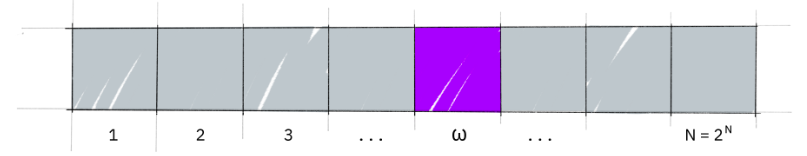

Klasik hesaplama ile mor kutuyu — yani **işaretli öğeyi** — bulmak için ortalama $N/2$, en kötü durumda ise $N$ kutuya bakmak gerekir. Kuantum bilgisayarda ise Grover’in genlik yükseltme hilesi ile bu öğe yaklaşık $\sqrt{N}$ adımda bulunabilir. Uzun listelerde kuadratik hızlanma önemli bir kazançtır. Ayrıca algoritma listenin iç yapısını kullanmadığından **genel (generic)** dir; bu da birçok klasik problem için otomatik olarak kuadratik kuantum hızlanma sağlar.

### 1.1 Algoritmaya Genel Bakış <a id='overview'></a>

Grover algoritması üç ana adımdan oluşur: **durum hazırlama**, **oracle** ve **difüzyon operatörü**.  
* **Durum hazırlama**: Aranacak uzayı (cevabın alabileceği tüm olasılıkları) yaratır. Liste örneğinde bu, listedeki bütün kutulardır.  
* **Oracle**: Doğru cevabı (veya cevapları) işaretler.  
* **Difüzyon operatörü**: İşaretlenmiş durumların genliğini büyütür, böylece ölçüm sonunda öne çıkar.

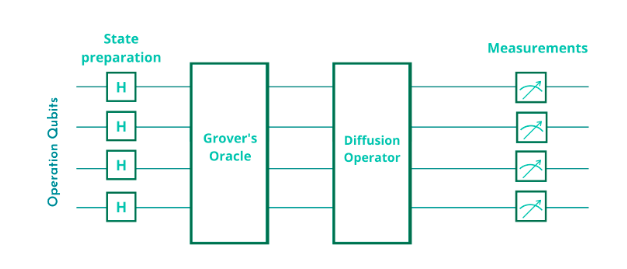

Algoritma nasıl işler? Listeye bakmadan önce işaretli öğenin nerede olduğunu bilmeyiz. Dolayısıyla herhangi bir tahmin diğerinden daha iyi değildir; bu durum


$|s \rangle = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N -1} | x \rangle.$

biçimindeki **uniform süperpozisyon** ile ifade edilir.  

Bu noktada $ \{|x\rangle\} $ tabanında ölçüm yapsaydık, süperpozisyon beşinci kuantum yasası gereği $\frac{1}{N}=\frac{1}{2^n}$ olasılıkla herhangi bir $|x\rangle$ durumuna çökebilirdi. Doğru öğe $w$’yu tahmin etme şansımız $1/2^n$’dir; dolayısıyla ortalama $N/2 = 2^{n-1}$ deneme gerekirdi.

İşte **genlik yükseltme** devreye girer. Bu prosedür, işaretli öğenin genliğini büyütür, diğer öğelerin genliğini küçültür; böylece ölçüm sonunda doğru öğe neredeyse kesin olarak elde edilir.

Bu algoritmanın güzel bir geometrik yorumu vardır: İki yansımanın oluşturduğu bir dönme (rotasyon). Özel olan iki durum **kazanan** $|w\rangle$ ve **uniform süperpozisyon** $|s\rangle$’dir. Bu iki vektör, $\mathbb{C}^N$ içinde iki boyutlu bir düzlem oluşturur. Tam dik olmasalar da, $|s\rangle$’den $|w\rangle$ bileşenini çıkarıp yeniden ölçekleyerek $|s'\rangle$ adında, $|w\rangle$’a dik bir vektör tanımlayabiliriz.

**Adım 1 – Başlangıç durumu**  
Kolayca hazırlanabilen uniform süperpozisyon:

$| s \rangle = H^{\otimes n} | 0 \rangle^n$

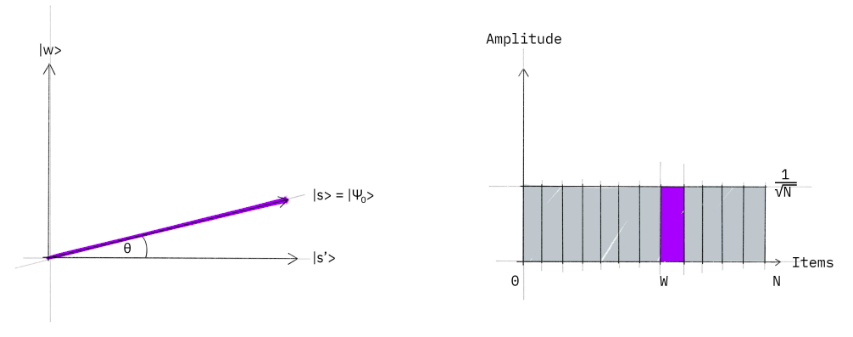

Solda $|w\rangle$ and $|s'\rangle$ ile gerilen düzlem, sağda ise $|s\rangle$’in genlik çubuk grafiği görülüyor. Burada  

$|s\rangle = \sin \theta | w \rangle + \cos \theta | s' \rangle,$ where $\theta = \arcsin \langle s | w \rangle = \arcsin \frac{1}{\sqrt{N}}$

**Adım 2 – Oracle yansıması \(U_f\)**  

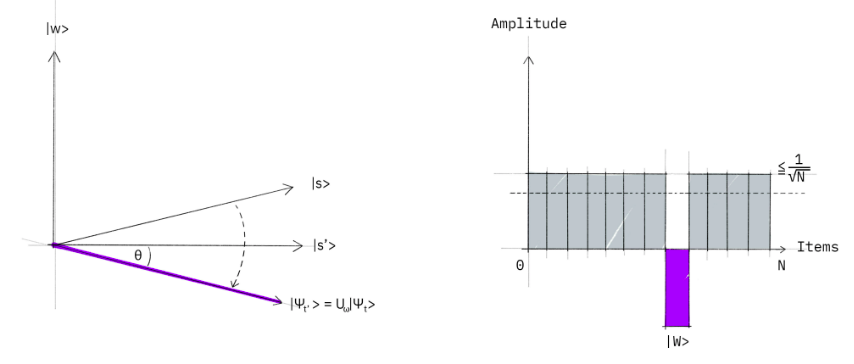

Geometrik olarak bu, $|s\rangle$’in $|s'\rangle$ etrafında yansıtılmasıdır. Sonuçta $|w\rangle$’ın genliği negatife döner; ortalama genlik (kesik çizgi) azalır.

**Adım 3 – Difüzyon yansıması \(U_s\)**  

$ U_s = 2|s\rangle\langle s|-\mathbb{1}$


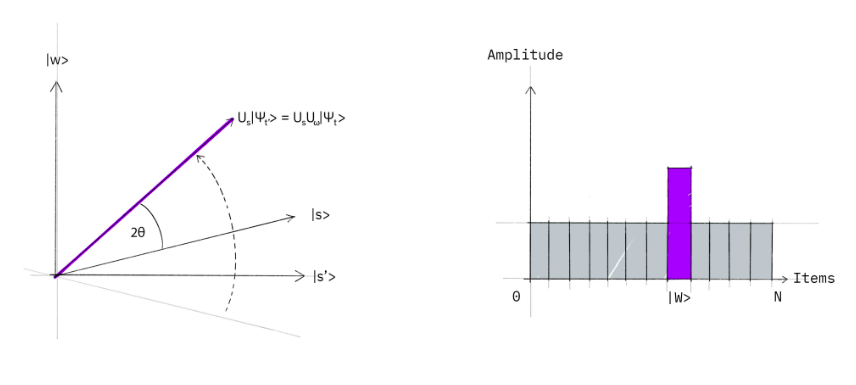

İki yansımanın bileşkesi bir dönmedir: $U_sU_f\ $ işlemi, başlangıç durumunu $ |w\rangle$’a yaklaştırır. Çubuk grafikte bakıldığında ortalama genlik çevresindeki yansıma, $|w\rangle$ genliğini yaklaşık üç katına çıkarır, diğerlerini azaltır. Sonra **Adım 2**’ye dönülür; bu döngü kazananı “hedefleyene” kadar sürer.

$t$ adım sonra


$ psi_t\rangle=(U_sU_f)^t|s\rangle$.


Kaç döngü gerekir? Yaklaşık $\sqrt{N}$. Çünkü $ t N^{-1/2}$ oranında **genlik** artar (olasılık değil!) ve boyut karekök olarak etkiler.  

En uygun iterasyon sayısı:


$ t=\Bigl\lfloor\frac{\pi}{4}\sqrt{\frac{N}{m}}\Bigr\rfloor$,


burada $N$ arama uzayı, $m$ ise aranan çözüm sayısıdır.

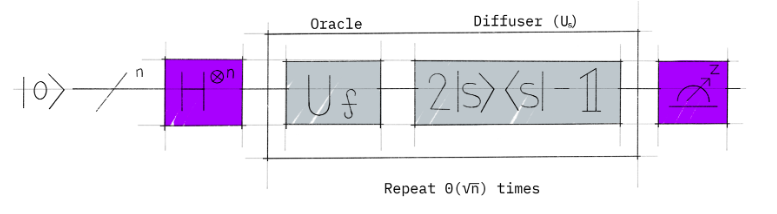

&nbsp;

## 1.2 Grover Adım Adım <a id='step'></a>

Artık Grover algoritmasının nasıl çalıştığını gördük; şimdi her bileşenin inşasına ve özel durumlarına daha yakından bakalım.

### 1.2.1 Arama Uzayını Hazırlamak <a id='state-prep'></a>

Grover’in ilk adımı başlangıç durumunun hazırlanmasıdır. Örneklerimizde “veritabanı”, kubitlerin alabileceği **hesaplama tabanı** durumlarının tamamıdır. Örneğin 3 kubit ile $ |000\rangle, |001\rangle, \dots, |111\rangle $ yani sekiz olası durum vardır; dolayısıyla $N = 2^{3} = 8$.

Eğer cevabın belirli bir alt aralıkta olduğundan eminseniz, gereksiz taban durumlarını hariç tutarak devreyi küçültebilir ve algoritmayı hızlandırabilirsiniz. Genel olarak arama uzayı, [symmetric states](gloss:ss) (örn. [GHZ](https://quantum-computing.ibm.com/composer/docs/iqx/example-circuits/ghz), [W](https://quantum-computing.ibm.com/composer/docs/iqx/example-circuits/w-state) veya [Dicke](gloss:ds) durumları) kullanılarak da hazırlanabilir.

Örneğin 4 kubit ve tek çözüm durumunda, Hadamard ile tam Hilbert uzayını seçersek $N=16$ olur. Ama cevabın yalnızca tek kubitin 1 olduğu durumlarda saklı olduğunu biliyorsak, W-durumunu kullanarak arama uzayını 16’dan 4’e, optimum $t$’yi de 3’ten 1’e düşürebiliriz.

### 1.2.2 Oracle Oluşturmak <a id='oracle'></a>

Grover’in en kritik adımı oracle’dır. Oracle, çözüm durumlarına negatif faz ekleyerek onları öne çıkarır:

$
U_\omega|x\rangle=\begin{cases}
\;|x\rangle & x\neq\omega,\\
-|x\rangle & x=\omega.
\end{cases}
$

Bu, işaretli öğeye denk gelen elemanı $-1$ fazıyla gösteren diyagonal bir matrise karşılık gelir. Örneğin 3 kubitte $\omega=101$ için:

$
U_\omega=
\begin{bmatrix}
1&0&0&0&0&0&0&0\\
0&1&0&0&0&0&0&0\\
0&0&1&0&0&0&0&0\\
0&0&0&1&0&0&0&0\\
0&0&0&0&1&0&0&0\\
0&0&0&0&0&-1&0&0\\
0&0&0&0&0&0&1&0\\
0&0&0&0&0&0&0&1
\end{bmatrix}
\quad\leftarrow\;\omega=101
$

Grover’i güçlü kılan, pek çok problemi bu biçimdeki bir oracle’a dönüştürmenin kolay oluşudur. Çözümü **bulmak** zor ama **doğrulamak** kolay olan problemlerde (ör. [sudoku](https://en.wikipedia.org/wiki/Sudoku)), $f(x)$ fonksiyonu tanımlanıp

$
U_\omega|x\rangle = (-1)^{f(x)}|x\rangle
$

şeklinde oracle elde edilir; burada $f(x)=1$ yalnızca $x=\omega$ için geçerlidir.

<details>
<summary>Bir Grover Oracle’ının Devre Olarak İnşası</summary>

Eğer klasik fonksiyon $f(x)$ elimizdeyse, onu şu tersinir devreye dönüştürebiliriz:

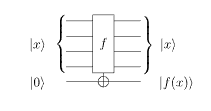

Çıkış kubiti $|-\rangle$ durumunda başlatılırsa faz geri-tepkisi, bu devreyi Grover oracle’ına dönüştürür (Deutsch-Jozsa’daki mantığa benzer):

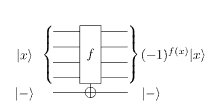

Sonrasında yardımcı $|-\rangle$ kubiti göz ardı edilir.
</details>

### 1.2.3 Difüzyon Operatörü <a id='diffusion'></a>

Oracle, doğru cevaba negatif faz ekledikten sonra Grover’in son adımı **difüzyon operatörü**dür.

Difüzyon operatörünün devre yapısı, başlangıç durumunu nasıl hazırladığınıza bağlıdır; genel formu şöyledir:

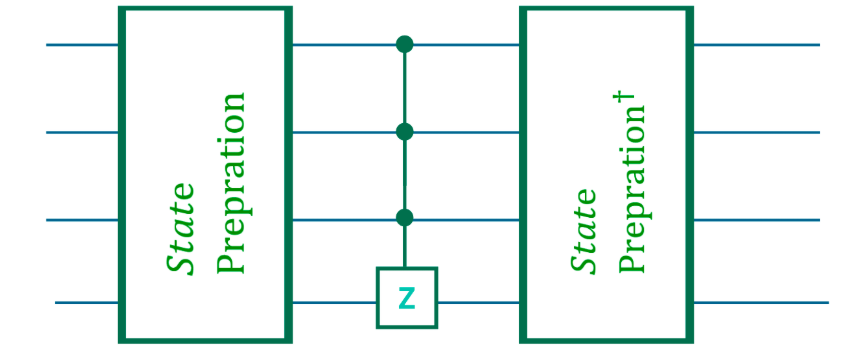

İlerleyen kısımda, $\omega$’yu baştan bildiğimiz oracles örnekleri kullanacağız. Bölüm sonunda ise sudoku ve ünlü “üçgen bulma” grafik problemi için işe yarar oracle’lar inşa edeceğiz.

## 2. Örnek: 2 Kubit <a id='2qubits'></a>

$N=4$ yani 2 kubitlik Grover için duruma bakalım. Bu özel durumda **yalnızca bir** rotasyon, başlangıç durumu $|s\rangle$’i kazanan $|w\rangle$’e döndürmek için yeterlidir [3]:

1. $N=4$ için  

   $
   \theta=\arcsin\frac{1}{2}=\frac{\pi}{6}.
   $

2. $t$ adım sonra  

   $
   (U_sU_\omega)^t|s\rangle
   = \sin\theta_t\,|\omega\rangle
   +\cos\theta_t\,|s'\rangle,
   $
   $
   \theta_t=(2t+1)\theta.
   $

3. $|\omega\rangle$ elde etmek için $\theta_t=\tfrac{\pi}{2}$ gerekir; $\theta=\tfrac{\pi}{6}$ koyunca $t=1$ bulunur. Yani tek rotasyon yeterlidir.

### Oracle : $|\omega\rangle=|11\rangle$

Bu durumda oracle $U_\omega$:

$
U_\omega|s\rangle
=\tfrac12\bigl(|00\rangle+|01\rangle+|10\rangle-|11\rangle\bigr),
$

ve matris olarak

$
U_\omega=
\begin{bmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&1&0\\
0&0&0&-1
\end{bmatrix},
$

yani **kontrollü-Z** kapısıdır:

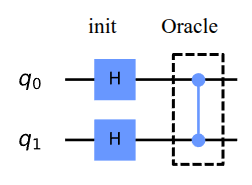

### Yansıma \(U_s\)

Ek yansıma  
$
U_s = 2|s\rangle\langle s|-\mathbb{1}
$
için:  

1. $H^{\otimes n}|s\rangle = |0\rangle$.  
2. $|0\rangle$’a dik tüm durumlara negatif faz ekleyen $U_0$:

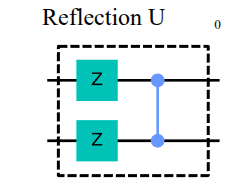

3. Sonra tekrar Hadamard: $U_s = H^{\otimes n}U_0H^{\otimes n}$:

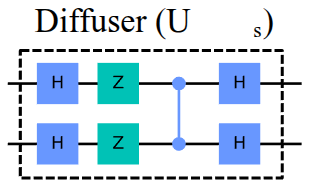

### $|\omega\rangle=|11\rangle$ İçin Tam Devre

$N=4$’te tek rotasyon yeterli olduğundan, bileşenleri birleştirerek tam Grover devresi:

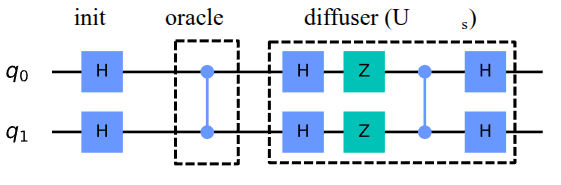

#### 2.1 Qiskit Gerçeklemesi

Şimdi $|\omega\rangle=|11\rangle$ için 2 kubitlik Grover algoritmasını Qiskit ile kodlayacağız.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

İki kübitli bir kuantum devresi hazırlayarak başlıyoruz:

In [29]:
n = 2
grover = QuantumCircuit(n)

O zaman yukarıda gösterilen devre için komutları yazmamız yeterlidir. İlk olarak, $|s\rangle$ durumunu başlatmamız gerekiyor. Genel bir fonksiyon oluşturalım (herhangi bir sayıda kübit için), böylece daha sonra tekrar kullanabiliriz:

In [30]:
def initialize_s(qc, qubits):
    """Devredeki kübitlere H-kapısı uygulayın"""
    for q in qubits:
        qc.h(q)
    return qc

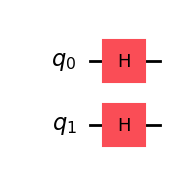

In [31]:
grover = initialize_s(grover, [0,1])
grover.draw(output='mpl')

Oracle'ı $|w\rangle = |11\rangle$ için uygulayın. Bu oracle 2 kübite özeldir:

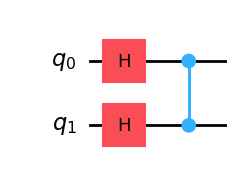

In [32]:
grover.cz(0,1) # Oracle
grover.draw(output='mpl')

<span id="Temel_difüzyon"></span>
Şimdi difüzörü ($U_s$) uygulamak istiyoruz. $s\rangle$ 'ı başlatan devrede olduğu gibi, daha sonra başka problemlerde kullanabilmek için genel bir difüzör (herhangi bir sayıda kübit için) oluşturacağız. 

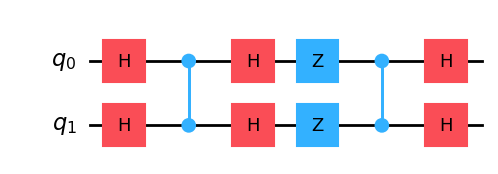

In [33]:
# Difüzyon operatörü (U_s)
grover.h([0,1])
grover.z([0,1])
grover.cz(0,1)
grover.h([0,1])
grover.draw(output='mpl')

In [34]:
sim = AerSimulator(method="statevector")  
grover.save_statevector()                  

In [35]:
qc_compiled = transpile(grover, sim)
result = sim.run(qc_compiled).result()
psi = result.get_statevector()

/home/hyperranger/anaconda3/envs/quantumpc/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [36]:
from qiskit.visualization import array_to_latex
array_to_latex(psi, prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

Beklendiği gibi, $|11\rangle$ olmayan her durumun genliği 0'dır, bu da $|11\rangle$ ölçme şansımızın %100 olduğu anlamına gelir:

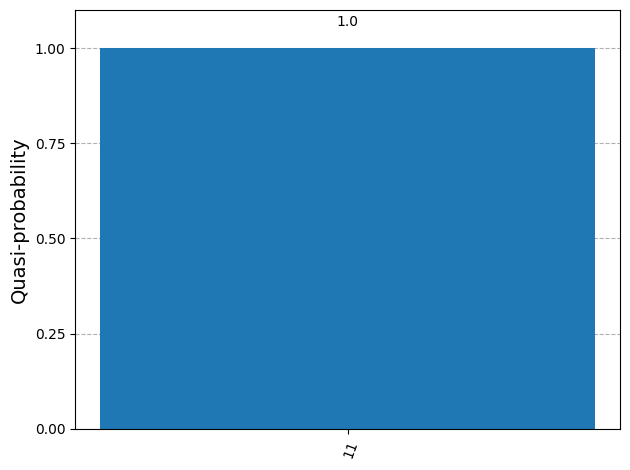

In [37]:
grover.measure_all()
qasm_sim = AerSimulator()
result = qasm_sim.run(qc_compiled, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

## 3. Örnek: 3 Kübit <a id='3qubits'></a>

Şimdi Referans [2]'de bulunan uygulamayı izleyerek, $\lvert101\rangle$ ve $\lvert110\rangle$ iki işaretli duruma sahip 3 kübit için Grover algoritması örneğini inceleyeceğiz. Bir faz oracle kullanarak problemi çözmek için kuantum devresi:

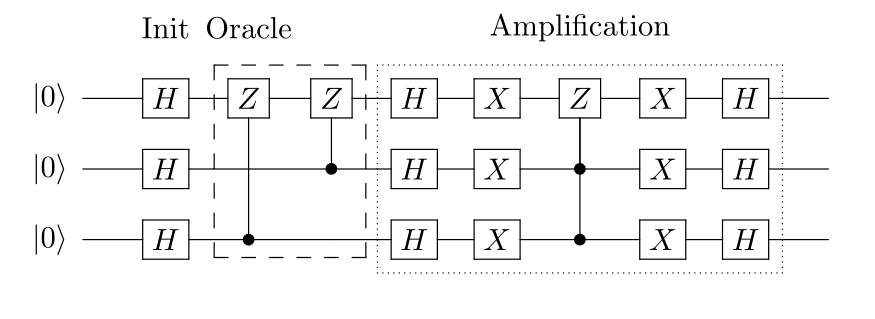

1. Düzgün bir süperpozisyon oluşturmak için $\lvert000\rangle$ olarak başlatılan $3$ kübitlere Hadamard kapıları uygulayın:
 $$\lvert \psi_1 \rangle = \frac{1}{\sqrt{8}} \left( 
    \lvert000\rangle + \lvert001\rangle + \lvert010\rangle + \lvert011\rangle + 
    \lvert100\rangle + \lvert101\rangle + \lvert110\rangle + \lvert111\rangle \right)
   $$

2. Bir faz oracle kullanarak $\lvert101\rangle$ ve $\lvert110\rangle$ durumlarını işaretleyin:
 $$\lvert \psi_2 \rangle = \frac{1}{\sqrt{8}} \left( 
    \lvert000\rangle + \lvert001\rangle + \lvert010\rangle + \lvert011\rangle + 
    \lvert100\rangle - \lvert101\rangle - \lvert110\rangle + \lvert111\rangle \right)
   $$

3. Ortalama genlik etrafında yansıma gerçekleştirin:
   1. Hadamard kapılarını kübitlere uygulayın
  
      $$
      \lvert \psi_{3a} \rangle = \frac{1}{2} \left( 
      \lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right)
      $$
   
   2. X kapılarını kübitlere uygulayın
      $$
      \lvert \psi_{3b} \rangle = \frac{1}{2} \left( 
      -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle +\lvert111\rangle \right)
      $$
   
   3. 1, 2 (kontroller) ve 3 (hedef) kübitler arasında çift kontrollü bir Z kapısı uygulayın
      $$
      \lvert \psi_{3c} \rangle = \frac{1}{2} \left( 
      -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right)
      $$
   
   4. Kübitlere X kapıları uygulayın
      $$
      \lvert \psi_{3d} \rangle = \frac{1}{2} \left( 
      -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right)
      $$

   
   5. Hadamard kapılarını kübitlere uygulayın
      $$
      \lvert \psi_{3e} \rangle = \frac{1}{\sqrt{2}} \left( 
      -\lvert101\rangle -\lvert110\rangle \right)
      $$


 4. $\lvert101\rangle$ ve $\lvert110\rangle$ durumlarını elde etmek için $3$ kübitlerini ölçün

Unutmayın ki 2 çözüm ve 8 olasılık olduğu için sadece bir iterasyon çalıştırmamız gerekecektir (adım 2 ve 3).

### 3.1 Qiskit Uygulaması <a id=‘3qubit-implementation’></a>

Şimdi yukarıdaki [örnek](#3qubits) için Grover'ın algoritmasını $3$-qubits için uygulayalım ve $\lvert101\rangle$ ve $\lvert110\rangle$ işaretli iki durumu arayalım. **Not:** Qiskit'in kübitlerini bu kaynağın tersi şekilde sıraladığını unutmayın, bu nedenle çizilen devre yatayda ters çevrilmiş olarak görünecektir.

Sonuçlar olarak $\lvert101\rangle$ ve $\lvert110\rangle$ durumlarını işaretleyecek bir faz oracle'ı oluşturuyoruz (adım 1).

In [38]:
qc = QuantumCircuit(3)
qc.cz(0,2)
qc.cz(1,2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_12947/3714262086.py:5: SyntaxWarning: invalid escape sequence '\o'
  oracle_ex3.name = "U$_\omega$"


Son bölümde 2 kübite özel bir difüzör kullandık, aşağıdaki hücrede herhangi bir sayıda kübit için genel bir difüzör oluşturacağız.

### Detay

<summary>Genel Difüzör Oluşturma</summary>

$U_0$'dan $U_s$ oluşturabileceğimizi unutmayın:

$$ U_s = H^{\otimes n} U_0 H^{\otimes n} $$

Ve çok kontrollü bir Z kapısı ($MCZ$) $|11\dots 1\rangle$ durumunun fazını tersine çevirir:

$$
MCZ = 
\begin{bmatrix}
 1 & 0 & 0 & \cdots & 0 \\
 0 & 1 & 0 & \cdots & 0 \\
 \vdots & \vdots & \vdots & \ddots & \vdots \\
 0 & 0 & 0 & \cdots & -1 \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\leftarrow \text{Negatif faz ekleyin} \; |11\dots 1\rangle\\
\end{aligned}
$$

Her bir kübite bir X-kapısı uygulamak dönüşümü gerçekleştirir:

$$ U_0 = - X^{\otimes n} (MCZ) X^{\otimes n} $$

Bu özellikleri birlikte kullanarak, H-kapıları, X-kapıları ve tek bir çoklu-kontrollü-Z kapısı kullanarak $U_s$ oluşturabiliriz:

$$ U_s = - H^{\otimes n} U_0 H^{\otimes n} = H^{\otimes n} X^{\otimes n} (MCZ) X^{\otimes n} H^{\otimes n} $$

Küresel -1 fazını göz ardı edebileceğimizi unutmayın.

In [39]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # |s> -> |00..0> (H-kapıları) Dönüşüm uygula 
    for qubits in range(nqubits):
        qc.h(qubits)
    # |00..0> -> |11..1> (X-kapıları) Dönüşüm uygula 
    for qubits in range(nqubits):
        qc.x(qubits)
    # Çoklu kontrollü Z kapısı uygula
    qc.h(nqubits-1)
    qc.mcx(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    # |11..1> -> |00..0> (X-kapıları) Dönüşüm uygula
    for qubits in range(nqubits):
        qc.x(qubits)
    # 00..0> -> |s> (H-kapıları) Dönüşüm uygula
    for qubits in range(nqubits):
        qc.h(qubits)
    # Difüzörü bir kapı olarak döndüreceğiz
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

Şimdi, devrenin başında düzgün bir süperpozisyon ve sonunda bir ölçüm oluşturarak parçaları bir araya getireceğiz. Unutmayın ki 2 çözüm ve 8 olasılık olduğu için sadece bir iterasyon çalıştırmamız gerekecek.

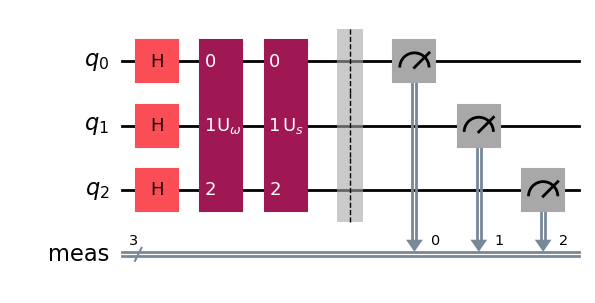

In [40]:
n = 3
grv = QuantumCircuit(n)
grv = initialize_s(grv, [0,1,2])
grv.append(oracle_ex3, [0,1,2])
grv.append(diffuser(n), [0,1,2])
grv.measure_all()
grv.draw(output='mpl')

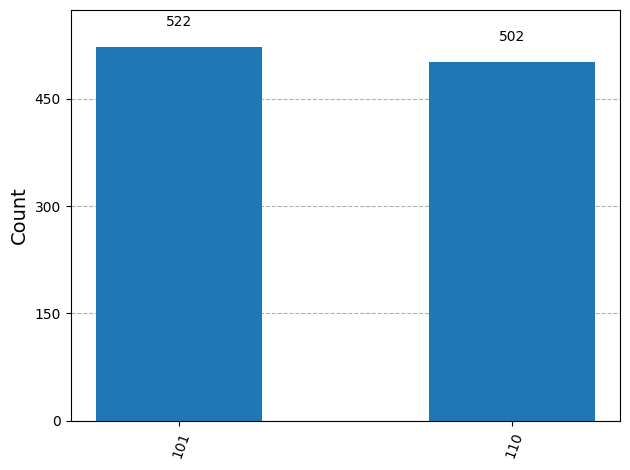

In [41]:
qasm_sim = AerSimulator()
transpiled_grover_circuit = transpile(grv, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

Gördüğümüz gibi, algoritma $\lvert101\rangle$ ve $\lvert110\rangle$ işaretli durumlarımızı keşfediyor.

## 4. Problemler <a id=‘problems’></a>

### Bölüm 4.1: Grover’ın Algoritmasıyla Sudoku Çözme

Bu bölümde, önceki bölümlerde çözümlerini önceden bildiğimiz orakl örneklerinin aksine, çözümünü önceden bilmediğimiz basit bir problemi Grover algoritmasıyla nasıl çözebileceğimizi gösteriyoruz. Karşımızdaki problem, 2×2 boyutunda ikili (binary) bir sudoku; bu sudoku için iki basit kural var:

- Hiçbir sütunda aynı değer iki kez bulunamaz.

- Hiçbir satırda aynı değer iki kez bulunamaz.

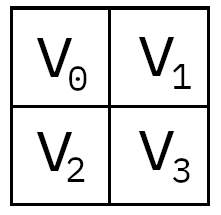

Her bir karenin bir değişkene karşılık geldiğini düşünürsek (örneğin üstteki iki kare v0 ve v1, alttaki iki kare v2 ve v3 olarak adlandırılır), devremizin bu kısıtları sağlayan bir atama bulmasını istiyoruz. Elbette 2×2’lik bir sudoku çok basit olduğu için çözümü kafadan bulmak kolay, ama burada asıl amaç, klasik karar problemlerini nasıl Grover oraklına dönüştürebileceğimizi göstermektir.

Öncelikle, bir “geçerli çözüm” olup olmadığını kontrol eden klasik bir işlevin kuantum devresini hazırlayacağız. Bu işlev, girişte aldığı dört bitin (v0, v1, v2, v3) her satır ve her sütun kısıtını sağladığını test edecek. Kontrol etmemiz gereken dört koşul şunlar:

- v0 ile v1 eşit değil (üst satır kısıtı)

- v2 ile v3 eşit değil (alt satır kısıtı)

- v0 ile v2 eşit değil (sol sütun kısıtı)

- v1 ile v3 eşit değil (sağ sütun kısıtı)

Burada bilgisayar bilimi terimleriyle, karşılaştırmalarını “hesaplama baz durumları” üzerinde yapıyoruz. Bu dört koşulu bir arada ele alabilmek için bunları bir dizi mantıksal ifade (clause) hâline getiriyoruz; her biri, ilgili iki değişkenin farklı olmasını (v_i ≠ v_j) test edecek. Orakl devremiz, bu dört testin hepsini sağlıyorsa “geçerli çözüm” bayrağını işaretleyecek şekilde tasarlanacak. Böylece Grover algoritmasının yayılma ve yansıma adımlarını uygular, sonunda ölçüm yaptığımızda geçerli sudoku çözümünü elde ederiz.

In [42]:
clause_list = [[0,1], [0,2],[1,3], [2,3]]

Her değişkenin değerini devremizdeki bir bite atayacağız. Bu koşulları hesaplamalı olarak kontrol etmek için `XOR` kapısı kullanacağız (bunu hesaplamanın atomlarında görmüştük).

In [43]:
def XOR(qc, a, b, output):
    """XOR işlemi için Qiskit devresi"""
    qc.cx(a, output)
    qc.cx(b, output)

Aşağıdaki devrede `output0` bitinin yalnızca `input0 ≠ input1` olduğunda tersine çevrileceğini kendinize kanıtlayın:

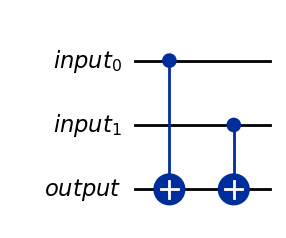

In [44]:
# Bitleri adlandırmak için ayrı registerlar kullanacağız.
in_qubits = QuantumRegister(2, name='input')
out_qubits = QuantumRegister(1, name='output')
qc = QuantumCircuit(in_qubits, out_qubits)
XOR(qc, in_qubits[0], in_qubits[1], out_qubits[0])
qc.draw(output='mpl')

Bu devre, `input0 == input1` olup olmadığını kontrol eder ve çıktıyı `output0`'a kaydeder. Her bir cümleyi kontrol etmek için, bu devreyi `clause_list` içindeki her bir çift için tekrarlar ve çıktıyı yeni bir bite kaydederiz:

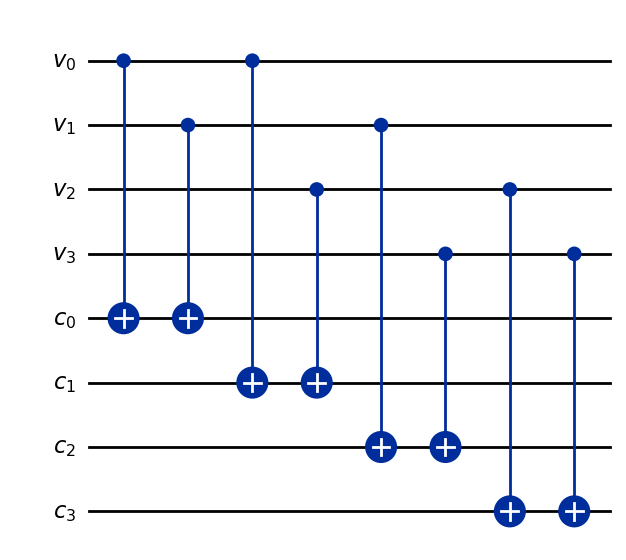

In [45]:
# Bitleri adlandırmak için ayrı registerlar oluşturun
var_qubits = QuantumRegister(4, name='v') # değişken bitleri
clause_qubits = QuantumRegister(4, name='c') # kısıtlama bitleri

# kuantum devresini oluşturun
qc = QuantumCircuit(var_qubits, clause_qubits)

# Her bir kısıtlama için XOR işlemi uygulayın
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

qc.draw(output='mpl')

`c0, c1, c2, c3` bitlerinin son durumu, yalnızca `v0, v1, v2, v3` atamaları sudoku için bir çözüm olduğu durumda `1` olacaktır. Kontrol devremizi tamamlamak için, tüm koşullar yerine getirildiğinde (ve yalnızca bu durumda) tek bir bitin `1` olmasını istiyoruz. Bu şekilde, atamamızın bir çözüm olup olmadığını görmek için tek bir biti kontrol etmemiz yeterli olacaktır. Bunu, çoklu kontrollü Toffoli kapısı kullanarak yapabiliriz:

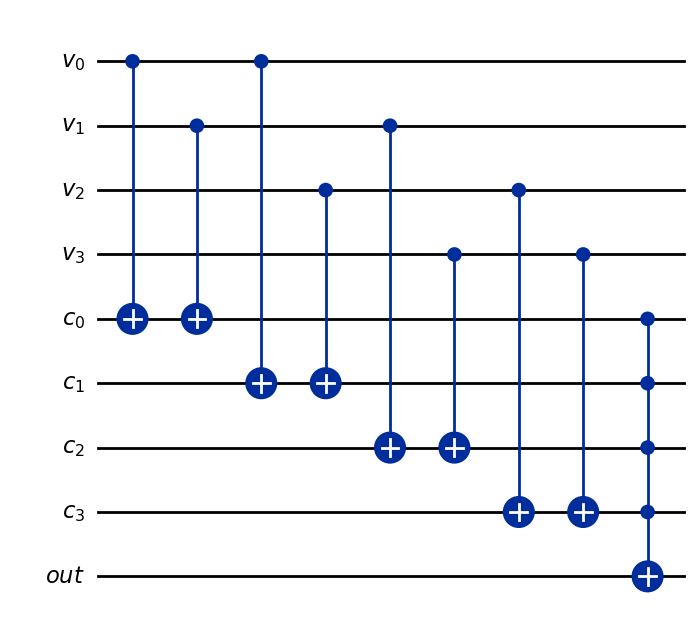

In [46]:
# Bitleri adlandırmak için ayrı registerlar oluşturun
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit)

# Her bir kısıtlama için XOR işlemi uygulayın
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

# Tüm koşullar karşılanırsa ‘çıktı’ bitini ters çevir
qc.mcx(clause_qubits, output_qubit)

qc.draw(output='mpl')

Yukarıdaki devre, `v0`, `v1`, `v2` ve `v3` bitlerinin ilk atamasını girdi olarak alır ve diğer tüm bitler `0` olarak başlatılmalıdır. Devre çalıştırıldıktan sonra, `out0` bitinin durumu bu atamanın bir çözüm olup olmadığını bize söyler; `out0 = 0`, atamanın bir çözüm olmadığını, `out0 = 1` ise atamanın bir çözüm olduğunu gösterir.

**Önemli:** Devam etmeden önce, bu devreyi tam olarak anlamanız ve yukarıdaki paragrafta belirtildiği gibi çalıştığından emin olmanız önemlidir.

### 4.1.2 Hesaplamayı Sonlandırma ve Oracle'ı Tamamlama

Şimdi bu kontrol devresini [faz geri tepme](/course/ch-gates/phase-kickback) kullanarak bir Grover oracle'a dönüştürebiliriz. Özetlemek gerekirse, 3 kayıt defterimiz var:
- Sudoku değişkenlerimizi depolayan bir kayıt defteri (buna $x = v_3, v_2, v_1, v_0$ diyelim)
- Koşullarımızı depolayan bir kayıt (bu, $|0000\rangle$ durumunda başlar ve bunu $|0\rangle$ olarak kısaltacağız)
- Ve kontrol devremizin çıktısını depolamak için kullandığımız bir kuantum bit ($|\text{out}_0\rangle$)

Bir oracle oluşturmak için, devremizin ($U_\omega$) şu dönüşümü gerçekleştirmesi gerekir:

$$
U_\omega|x\rangle|0\rangle|\text{out}_0\rangle = |x\rangle|0\rangle|\text{out}_0\oplus f(x)\rangle
$$

`out0` kuantum bitini süperpozisyon durumu $|{-}\rangle$ olarak ayarlarsak, şunu elde ederiz:

$$
\begin{aligned}
U_\omega|x\rangle|0\rangle|{-}\rangle 
&= U_\omega|x\rangle|0\rangle\otimes\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\\
&= |x\rangle|0\rangle\otimes\tfrac{1}{\sqrt{2}}(|0\oplus f(x)\rangle - |1\oplus f(x)\rangle)
\end{aligned}
$$

$f(x) = 0$ ise, şu durum söz konusudur:


$$
\begin{aligned}
&= |x\rangle|0\rangle\otimes \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\\
&= |x\rangle|0\rangle|-\rangle\\
\end{aligned}
$$

(yani değişiklik yok). Ancak $f(x) = 1$ (yani $x = \omega$) ise, $|{-}\rangle$ kuantum bitine negatif bir faz ekleriz:


$$
\begin{aligned}
&= \phantom{-}|x\rangle|0\rangle\otimes\tfrac{1}{\sqrt{2}}(|1\rangle - |0\rangle)\\
&= \phantom{-}|x\rangle|0\rangle\otimes -\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\\
&= -|x\rangle|0\rangle|-\rangle\\
\end{aligned}
$$


Bu, $|0\rangle|{-}\rangle$ durumunda iki yardımcı kayıt kullanan işlevsel bir oracle'dır:

$$
U_\omega|x\rangle|0\rangle|{-}\rangle = \Bigg\{
\begin{aligned}
\phantom{-}|x\rangle|0\rangle|-\rangle \quad \text{for} \; x \neq \omega \\
-|x\rangle|0\rangle|-\rangle \quad \text{for} \; x = \omega \\
\end{aligned}
$$


Kontrol devremizi Grover oracle'ına uyarlamak için, ikinci kayıtçıdaki bitlerin (`c`) hesaplamadan sonra her zaman $|0000\rangle$ durumuna geri döndüğünü garanti etmemiz gerekir. Bunu yapmak için, devremiz çalıştıktan sonra `c0 = c1 = c2 = c3 = 0` olduğunu garanti eden maddeleri hesaplayan devre kısmını tekrar ederiz. Bu adıma _'hesaplamanın geri alınması'_ adını veriyoruz.

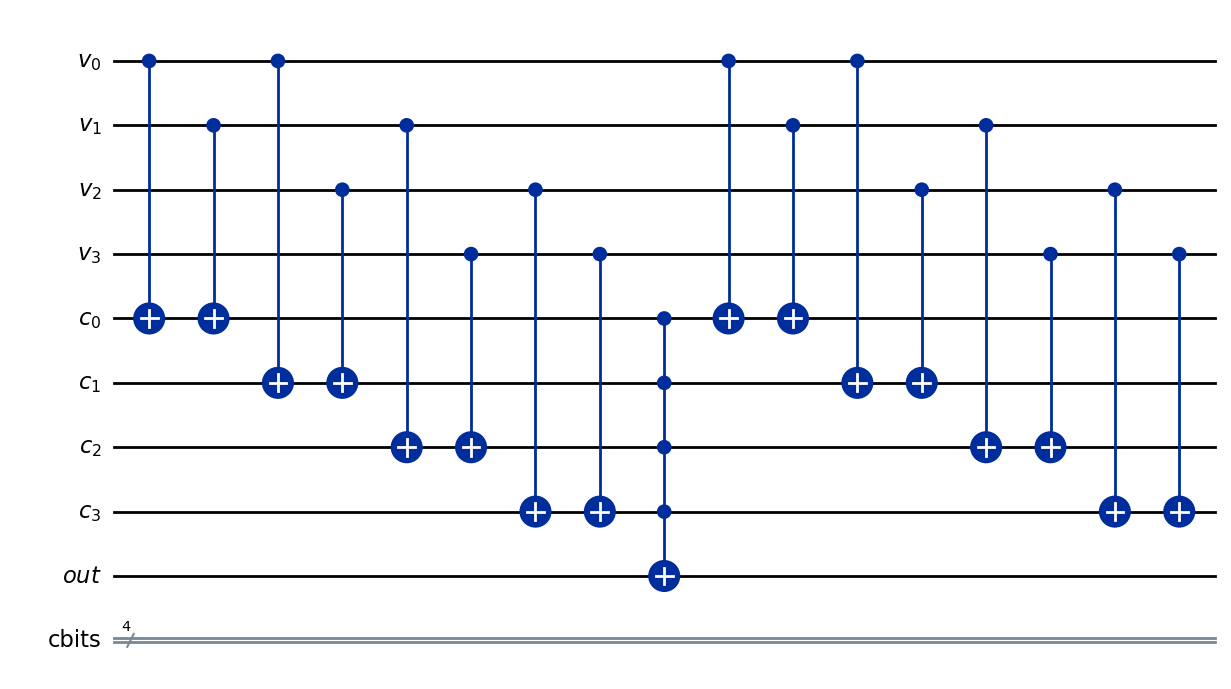

In [47]:
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

def sudoku_oracle(qc, clause_list, clause_qubits):
    """Sudoku kısıtlamalarını uygulayan Oracle"""
    # Her bir kısıtlama için XOR işlemi uygulayın
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Tüm koşullar karşılanırsa ‘çıktı’ bitini ters çevir
    qc.mcx(clause_qubits, output_qubit)

    # Uncompute clauses, clause-checking bitlerini 0'a sıfırlamak için kullanılır.
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1
sudoku_oracle(qc, clause_list, clause_qubits)
qc.draw(output='mpl')

Özetle, yukarıdaki devre şunları gerçekleştirir:

$$
U_\omega|x\rangle|0\rangle|\text{out}_0\rangle = \Bigg\{
\begin{aligned}
|x\rangle|0\rangle|\text{out}_0\rangle \quad \text{for} \; x \neq \omega \\
|x\rangle|0\rangle\otimes X|\text{out}_0\rangle \quad \text{for} \; x = \omega \\
\end{aligned}
$$

ve eğer başlangıç durumu $|\text{out}_0\rangle = |{-}\rangle$ ise:

$$
U_\omega|x\rangle|0\rangle|{-}\rangle = \Bigg\{
\begin{aligned}
\phantom{-}|x\rangle|0\rangle|-\rangle \quad \text{for} \; x \neq \omega \\
-|x\rangle|0\rangle|-\rangle \quad \text{for} \; x = \omega \\
\end{aligned}
$$

## 4.1.3 Full Algoritma

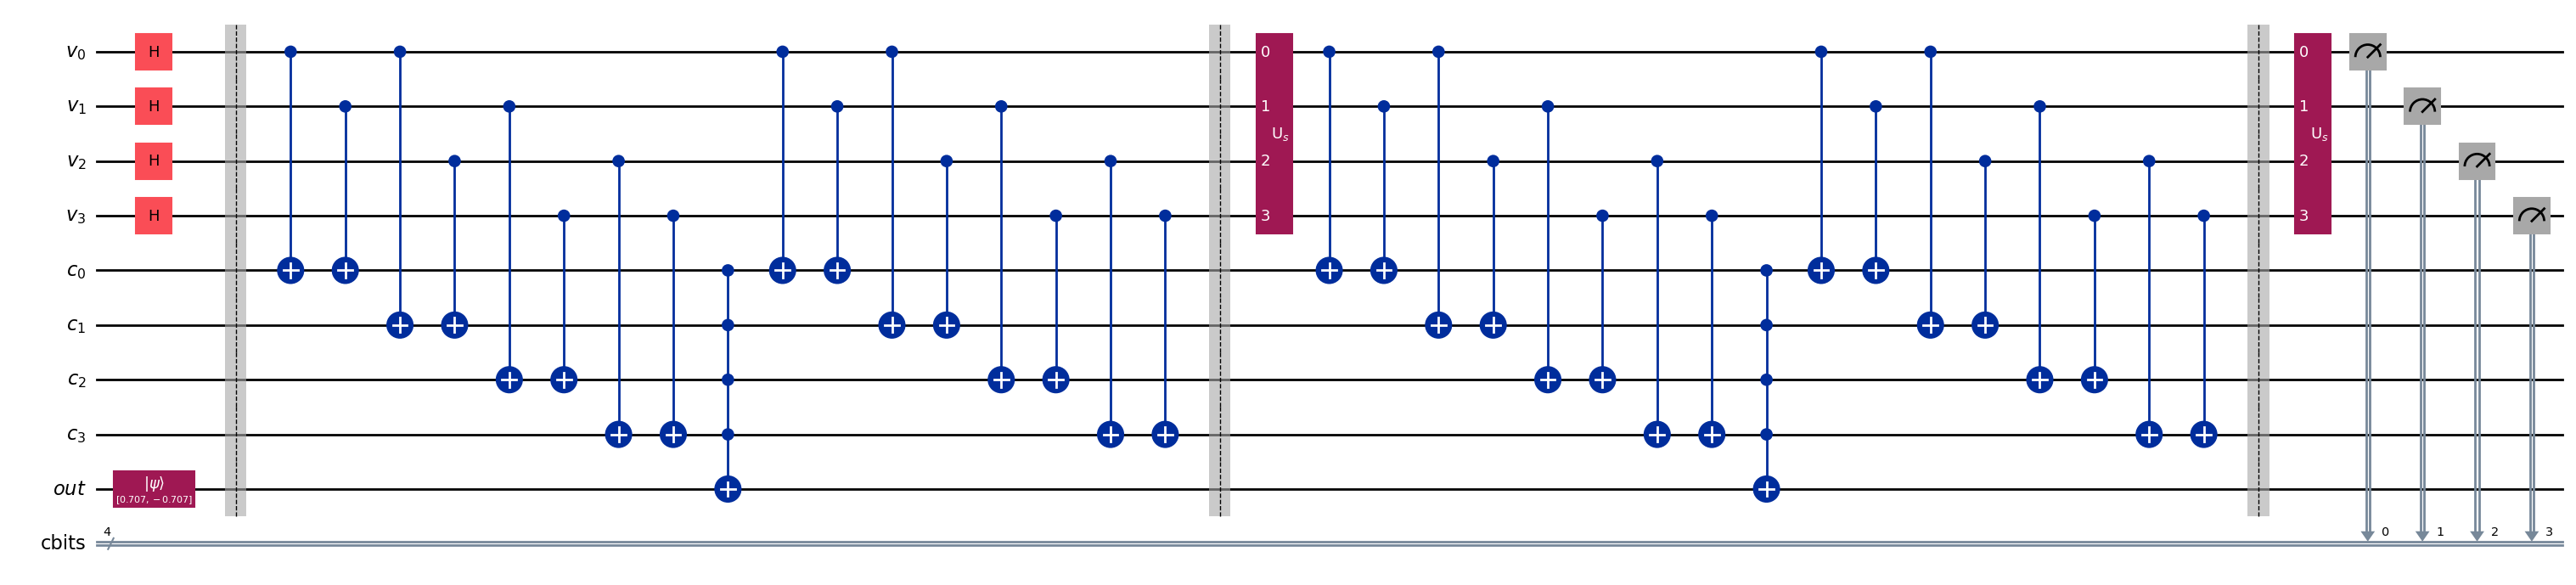

In [48]:
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# ‘out0’ durumunu başlat |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Qubitleri |s> durumunda başlat
qc.h(var_qubits)
qc.barrier()  # Görsel ayrım için

## İlk İterasyon
# Oracle'ımızı uygulayın
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  ## Görsel ayrım için
# Defüzyon operatörünü uygulayın
qc.append(diffuser(4), [0,1,2,3])

## İkinci İterasyon
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # Görsel ayrım için
# Defüzyon operatörünü uygulayın
qc.append(diffuser(4), [0,1,2,3])

# Değişken kuantum bitlerini ölçün
qc.measure(var_qubits, cbits)

qc.draw(output='mpl',fold=-1)

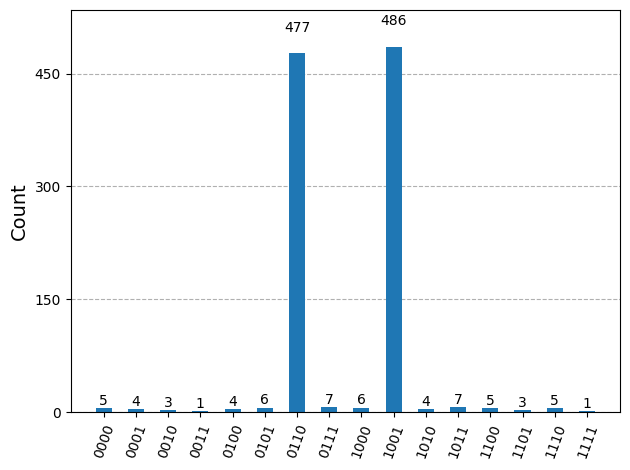

In [49]:
qasm_sim = AerSimulator()
transpiled_sudoku_circuit = transpile(qc, qasm_sim)
results = qasm_sim.run(transpiled_sudoku_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

Diğerlerinden çok daha yüksek ölçüm olasılığına sahip iki bit dizisi vardır: `0110` ve `1001`. Bunlar aşağıdaki atamalara karşılık gelir:

```
v0 = 0
v1 = 1
v2 = 1
v3 = 0
```
ve
```
v0 = 1
v1 = 0
v2 = 0
v3 = 1
```

Bunlar sudoku'muzun iki çözümü! Bu bölümün amacı, gerçek problemlerden Grover oracle'ları nasıl oluşturabileceğimizi göstermektir. Bu özel problem önemsiz olsa da, süreç (yeterince büyük devreler izin verdiği sürece) herhangi bir karar problemine uygulanabilir. Özetlemek gerekirse, adımlar şunlardır:

1. Doğru çözümü belirleyen tersine çevrilebilir klasik bir devre oluşturun
2. Faz geri tepme ve hesaplamasızlık yöntemlerini kullanarak bu devreyi bir oracle'a dönüştürün
3. Grover algoritmasını kullanarak bu oracle'ı çözün

## 4.2 Grover Kullanarak Üçgen Bulma Problemi

Ünlü [grafik teorisi](gloss:gt) problemlerinden biri [üçgen bulma problemi](https://en.wikipedia.org/wiki/Triangle-free_graph)dir. Üçgen bulma problemlerinde, üçgen içerebilen veya içermeyen bir grafik verilir. Görevimiz, grafik içindeki üçgenleri bulmak ve üçgeni oluşturan düğümleri belirtmektir. Örneğin, aşağıdaki grafik, `0`, `1` ve `2` düğümleri arasında bir üçgen bulunan 4 düğümlü bir grafiktir.

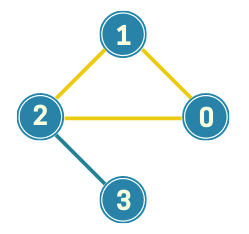

Bu soruna Grover algoritmasını uygulayabiliriz. Algoritmaya, kenarların listesini ve grafikteki düğümlerin sayısını vereceğiz. Algoritma, gerisini halledecektir. Grafikte bir üçgen olup olmadığını kontrol edecek ve varsa, o üçgeni oluşturan düğümleri işaretleyecektir.

Şimdi, Grover algoritmasının adımlarını inceleyelim ve üçgen bulma problemini çözmek için her adımı nasıl oluşturabileceğimizi görelim. Ama önce, girdiğimizi, yani kenarların listesini tanımlayalım.

In [1]:
# Kenar Listesi
edges = [(0,1), (0,2), (1,2), (2,3)]

# Düğüm Saysı
n_nodes = 4

### 4.2.1 Durum Hazırlığı

Sorunu çözmek için, önce yukarıdaki örneğe odaklanalım. Bu örnek, 4 düğümlü bir grafikte bir üçgen bulma durumudur. Bunu yapmak için, grafiğimizdeki tüm alt grafikleri gözden geçirmeli ve bunlardan herhangi birinin üçgen olup olmadığını kontrol etmeliyiz. Bunu yapmak için 4 kuubit gerekir; her kuubit, grafikteki bir düğümü temsil eder. Kuubitin durumu, düğümün herhangi bir alt grafikte olup olmadığını gösterir. Örneğin, yukarıdaki grafikte üçgen 0, 1 ve 2 düğümleri arasında yer almaktadır. Bunu `1110` durumu kullanarak yeniden ifade edebiliriz. Durumu 1 olan düğümler alt grafikte (üçgen) yer alırken, durumu 0 olan düğüm yer almamaktadır.   

Durum hazırlığı için, `0000`'dan `1111`'e kadar tüm olası durumların süperpozisyonunu oluşturmamız gerekecektir. Bu, `4` Hadamard kapısı kullanılarak kolayca yapılabilir. Bunu yaparken, oracle ve difüzyonu `3` kez döndürmemiz gerekecektir.
Ancak, durumdaki her `1` aktif bir düğümü temsil ediyorsa, Hilbert uzayının tamamını incelememize gerek yoktur, sadece üç düğümlü alt grafikleri incelememiz yeterlidir.    

Bu, arama alanını hazırlamak için başka bir simetrik durum türü kullanmanın iyi bir örneğidir. Burada, yalnızca üç 1 içeren durumları dikkate almamız gerektiğinden, arama alanımızı oluşturmak için başka bir yol düşünebiliriz. Yalnızca üç aktif düğüm içeren durumlar üzerinde bir üst üste binme oluşturmanın bir yolu, W durumunu ve ardından `4 NOT kapısı` kullanmaktır. Bu, gereken döndürme sayısını `3`'ten `1`'e düşürecektir.

Bu nedenle, önce W durumunu uygulamamız gerekiyor. W durumları şu şekilde ifade edilir:

$$
|W\rangle = {\frac{1}{{\sqrt{n}}}}(|100...0\rangle + ... + |01...0\rangle + |00...01\rangle)
$$

Bizim durumumuzda, referans 6'da açıklanan şekilde $|W_{3}\rangle$ durumlarını oluşturmamız gerekiyor.

In [3]:
def control_rotation(qcir,cQbit,tQbit,theta):
    """
    Sadece birim kapısı ve kontrollü NOT kullanarak ara kontrollü dönüş oluşturun.

    Args:
        qcir (QuantumCircuit): Kuantum devresi
        cQbit (int): Kontrollü kübit
        tQbit (int): Hedef kübit
        theta (float): Dönüş açısı
    
    Returns:
    Kontrol rotasyonu uygulanan QuantumCircuit örneğinin değiştirilmiş bir versiyonu.
    """

    theta_dash = math.asin(math.cos(math.radians(theta/2)))
    qcir.u(theta_dash, 0, 0, tQbit)  # U(theta_dash, 0, 0) uygulayın
    qcir.cx(cQbit, tQbit)  # Kontrollü NOT uygulayın
    qcir.u(-theta_dash, 0, 0, tQbit)
    return qcir

In [4]:
def wn (qcir,qbits):
    """
    Kontrol-dönüş fonksiyonunu kullanarak W durumunu oluşturun.

    Args:
        qcir: W durumunu oluşturmak için kullanılan QuantumCircuit örneği.
        qbits: W durumunu oluşturmak için kullanılan kuantum bitleri.
    
    Returns:
        W-durum yapı kapıları ile QuantumCircuit örneğinin değiştirilmiş bir versiyonu.
    """
    for i in range(len(qbits)):
        if i==0:
            qcir.x(qbits[0])
            qcir.barrier()
        else:
            p = 1/(len(qbits)-(i-1))
            theta = math.degrees(math.acos(math.sqrt(p)))
            theta = 2* theta
            qcir = control_rotation(qcir, qbits[i-1], qbits[i], theta)
            qcir.cx(qbits[i], qbits[i-1])
            qcir.barrier()
        
    return qcir, qbits

sub_qbits = QuantumRegister(n_nodes)
sub_cir = QuantumCircuit(sub_qbits, name="state_prep")
sub_cir, sub_qbits = wn(sub_cir, sub_qbits)
sub_cir.x(sub_qbits)
stat_prep = sub_cir.to_instruction()
inv_stat_prep = sub_cir.inverse().to_instruction()

## 4.2.2 Oracle

Doğru cevabı belirleyecek olan oracle'dır. Bu durumlarda, oracle her alt grafiği alıp o alt grafikteki kenar sayısını saymalıdır. Kenar sayısı `3` ise, bir üçgenimiz vardır, değilse, bir sonraki alt grafiğe geçilir.

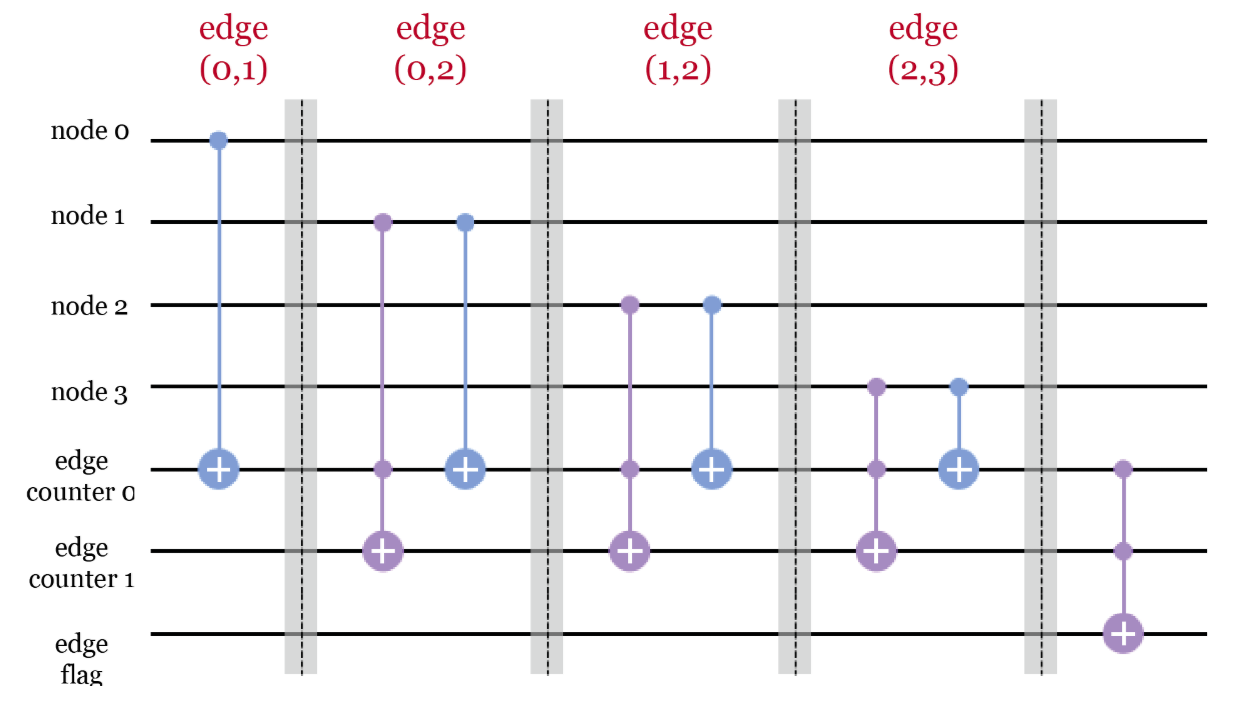

Grafikteki her kenar için bir veya iki `CNOT` kapısı gerekecektir. Bu `CNOT` kapıları, bir üçgen bulunursa `11` durumunda olması gereken iki yardımcı kuantum bitine uygulanacaktır. Burada yardımcı kuantum bitlerinin sayısı ikidir, çünkü bir üçgenin `3` kenarı vardır. Sonra, oracle'ın son adımı, bir üçgen bulunursa aktif olacak bir Toffoli daha uygulamaktır. Bunu, başka bir kuantum bitinin durumunu `1` olarak değiştirerek yapacağız. Bu kuantum bitine `tri_flag` diyelim.

## Hatırlatma

Oracle'ın görevi, doğru cevabı doğrulamak ve işaretlemektir. Dolayısıyla, bir oracle oluşturduğunuzda, temelde belirli koşulları doğrulamak için bir devre kurmuş olursunuz.

In [18]:
def edge_counter(qc, qubits, ancilla, flag, k):
    bin_k = bin(k)[2:][::-1]
    controls = []
    for i, bit in enumerate(bin_k):
        if bit == '1':
            controls.append(qubits[i])
    # tüm kontrolleri topladıktan sonra bir kez çağırın
    qc.mcx(controls, flag, [ancilla])


def oracle(n_nodes, edges, qc, nodes_qubits, edge_anc, ancilla, neg_base):
    k=3 #k kenarların sayısıdır, üçgen durumunda bu sayı 3'tür.

    #1- kenar sayacı
    #ileri devre
    qc.barrier()
    qc.ccx(nodes_qubits[edges[0][0]],nodes_qubits[edges[0][1]],edge_anc[0])
    for i in range(1,len(edges)):
        qc.mcx([nodes_qubits[edges[i][0]],nodes_qubits[edges[i][1]],edge_anc[0]], edge_anc[1], [ancilla[0]])
        qc.ccx(nodes_qubits[edges[i][0]],nodes_qubits[edges[i][1]],edge_anc[0])

    #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #Kenarlar qubitleri kontrol qubitleri olarak kullanılır, bu nedenle kenar sayısını kontrol etmek için kenar sayacı devresini uygularız.
    edg_k = int((k/2)*(k-1))
    edge_counter(qc,edge_anc,ancilla[0],neg_base[0],edg_k)
    #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    #4- Ters kenar sayımı
    for i in range(len(edges)-1,0,-1):
        qc.ccx(nodes_qubits[edges[i][0]],nodes_qubits[edges[i][1]],edge_anc[0])
        qc.mcx([nodes_qubits[edges[i][0]],nodes_qubits[edges[i][1]],edge_anc[0]], edge_anc[1], [ancilla[0]])
    qc.ccx(nodes_qubits[edges[0][0]],nodes_qubits[edges[0][1]],edge_anc[0])
    qc.barrier()

## 4.2.3 Difüzyon operatörü

Daha önce de belirttiğimiz gibi, difüzyon operatörü yapısı kullandığımız durum hazırlığının türüne bağlıdır, bu durumda W durumu. Dolayısıyla, difüzyon operatörünü oluşturmak için ters W durumu, çoklu kontrollü Z kapısı ve orijinal W durumuna ihtiyacımız var.

In [19]:
def cnz(qc, num_control, node, anc):
    """Çoklu kontrollü Z kapısı oluşturun
    
    Args:
    num_control :  cnz kapısının kontrol kuantum bitlerinin sayısı
    node :             düğüm qubitler
    anc :               ancillaly qubitler
    """
    if num_control>2:
        qc.ccx(node[0], node[1], anc[0])
        for i in range(num_control-2):
            qc.ccx(node[i+2], anc[i], anc[i+1])
        qc.cz(anc[num_control-2], node[num_control])
        for i in range(num_control-2)[::-1]:
            qc.ccx(node[i+2], anc[i], anc[i+1])
        qc.ccx(node[0], node[1], anc[0])
    if num_control==2:
        qc.h(node[2])
        qc.ccx(node[0], node[1], node[2])
        qc.h(node[2])
    if num_control==1:
        qc.cz(node[0], node[1])

def grover_diff(qc, nodes_qubits,edge_anc,ancilla,stat_prep,inv_stat_prep):
    qc.append(inv_stat_prep,qargs=nodes_qubits)
    qc.x(nodes_qubits)
    #====================================================
        #3 kontrol kuantum bitleri Z kapısı
    cnz(qc,len(nodes_qubits)-1,nodes_qubits[::-1],ancilla)
    #====================================================
    qc.x(nodes_qubits)
    qc.append(stat_prep,qargs=nodes_qubits)

## 4.2.4 Hepsini bir araya getirmek

Algoritmanın tüm bileşenlerini oluşturup çalıştırmaya başladığımıza göre, bunları bir araya getirebiliriz.

In [20]:
def grover(n_nodes,stat_prep,inv_stat_prep):
    #N = 2**n_nodes  # durum hazırlığı yalnızca H kapıları kullanılarak yapıldığında optimum yineleme sayısı için.
    N = math.comb(n_nodes, 3) #İlk hazırlığı yapmak için W-durumu kullanıyoruz.
    nodes_qubits = QuantumRegister(n_nodes, name='nodes')
    edge_anc = QuantumRegister(2, name='edge_anc')
    ancilla = QuantumRegister(n_nodes-2, name = 'cccx_diff_anc')
    neg_base = QuantumRegister(1, name='check_qubits')
    class_bits = ClassicalRegister(n_nodes, name='class_reg')
    tri_flag = ClassicalRegister(3, name='tri_flag')
    qc = QuantumCircuit(nodes_qubits, edge_anc, ancilla, neg_base, class_bits, tri_flag)
    # Kuantum bayraklı kubitleri |-> durumunda başlat
    qc.x(neg_base[0])
    qc.h(neg_base[0])
    # Süperpozisyonda i/p kuantum bitlerini başlatma
    qc.append(stat_prep,qargs=nodes_qubits)
    qc.barrier()
    # İterasyon sayısını hesapla
    iterations = math.floor(math.pi/4*math.sqrt(N))
    # İterasyon sayısını hesapla
    for i in np.arange(iterations):
        qc.barrier()
        oracle(n_nodes, edges, qc, nodes_qubits, edge_anc,  ancilla, neg_base)
        qc.barrier()
        grover_diff(qc, nodes_qubits,edge_anc,ancilla,stat_prep,inv_stat_prep)
    qc.measure(nodes_qubits,class_bits)
    return qc

Şimdi, kodu çalıştırıp histogramı çizerek algoritmamızın beklendiği gibi çalışıp çalışmadığını görelim.

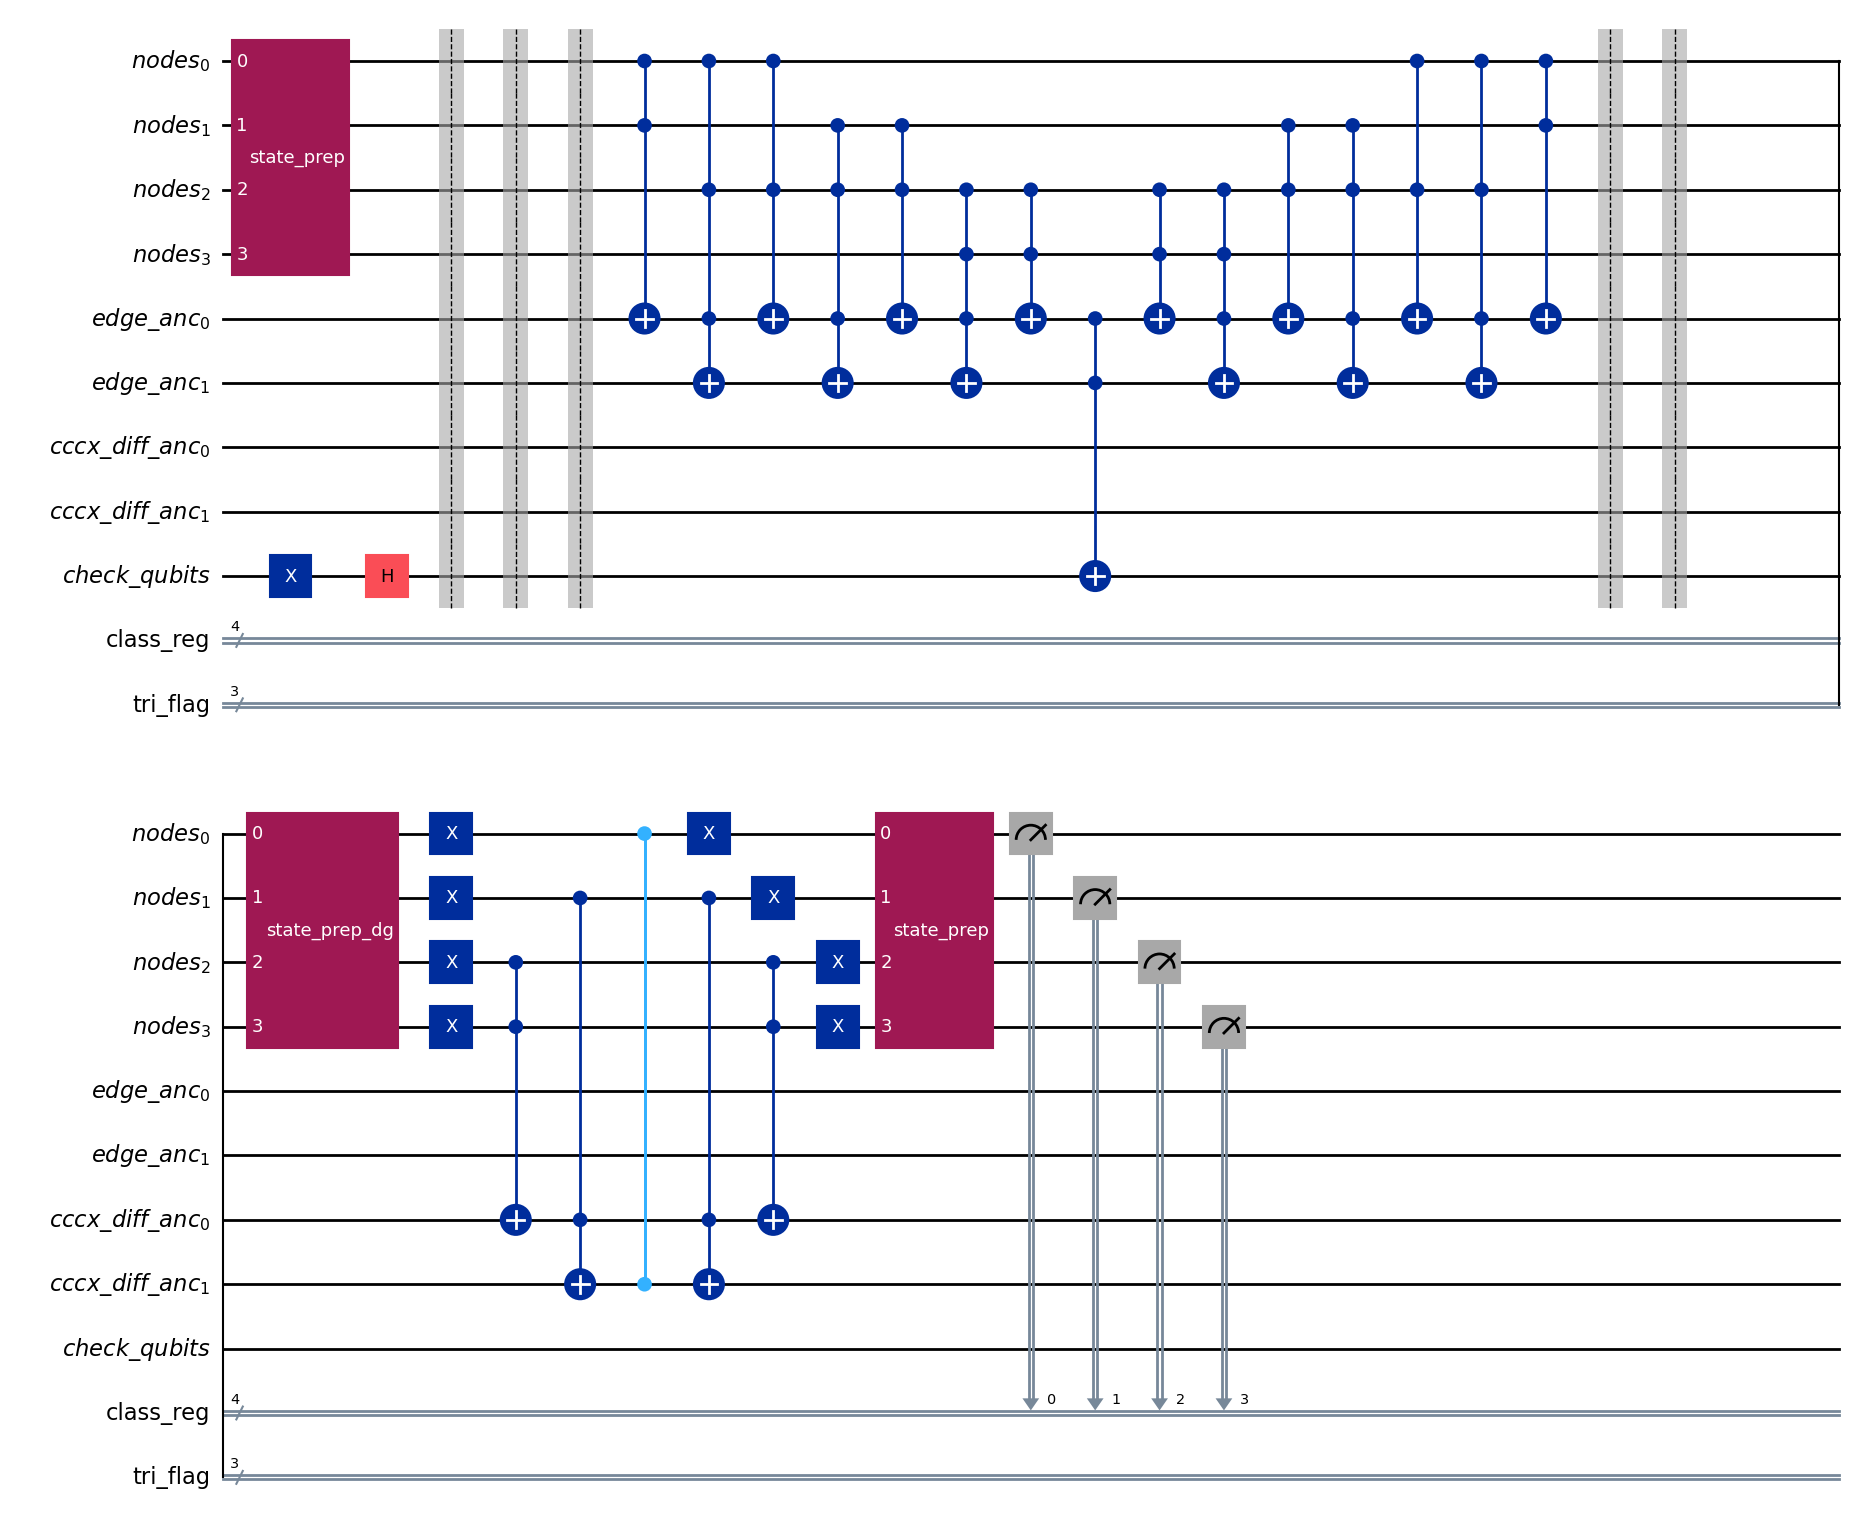

In [21]:
qc = grover(n_nodes,stat_prep,inv_stat_prep)
qc.draw(output='mpl')

/home/hyperranger/anaconda3/envs/quantumpc/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


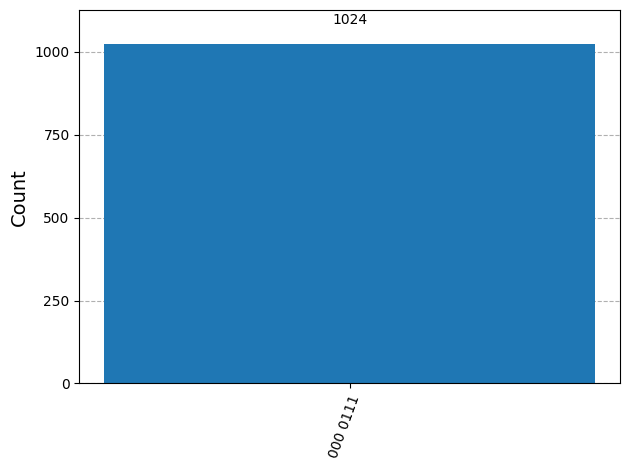

In [22]:
qasm_sim = AerSimulator()
transpiled_circuit = transpile(qc, qasm_sim)
results = qasm_sim.run(transpiled_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

## DinnerParty

In [23]:
# 1) Önce hangi bit dizilerinin işlevi sağladığını bulun
def is_solution(x):
    # x: 4-bit string [J, La, K, R]
    J, La, K, R = [int(b) for b in x]
    return ((J and La) or (K and R)) and not (La and R)

# Tüm 4-bit dizilerini kontrol et
solutions = [x for x in [format(i, '04b') for i in range(16)] if is_solution(x)]
print("Çözümler:", solutions)

Çözümler: ['0011', '1011', '1100', '1110']


In [24]:
# 2) Grover devresini kur
n = 4
qc = QuantumCircuit(n, n)

# (a) Başlangıçta tüm qubitleri süperpozisyona geçir
qc.h(range(n))

# (b) Oracle: Çözümleri faz 𝜋 ile işaretle
for sol in solutions:
    # Her sol için
    #  - bit=0 olan qubitlere X uygula (kontrol olarak 1’e eşitlemek için)
    for i, b in enumerate(sol):
        if b == '0':
            qc.x(i)
    #  - Çok kontrollü Z: hedef qubit olarak son qubit (3) seçip
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)   # controls=0..n-2, target=n-1
    qc.h(n-1)
    #  - Temizlik: X’leri geri al
    for i, b in enumerate(sol):
        if b == '0':
            qc.x(i)

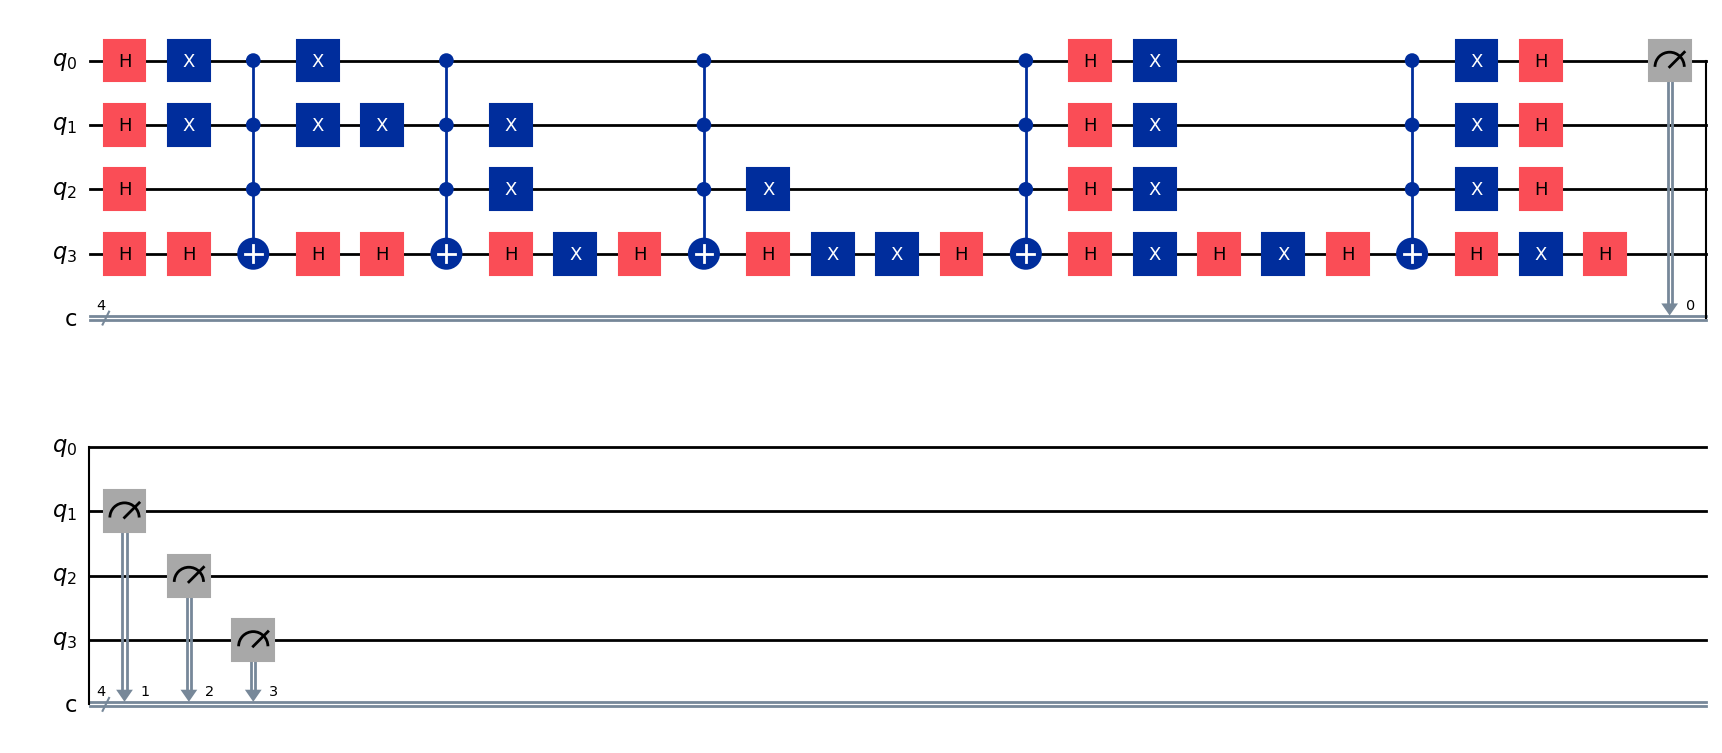

In [25]:
# (c) Diffuser (inversion about the mean)
qc.h(range(n))
qc.x(range(n))
qc.h(n-1)
qc.mcx(list(range(n-1)), n-1)
qc.h(n-1)
qc.x(range(n))
qc.h(range(n))

# (d) Ölçüm
qc.measure(range(n), range(n))
qc.draw(output='mpl')

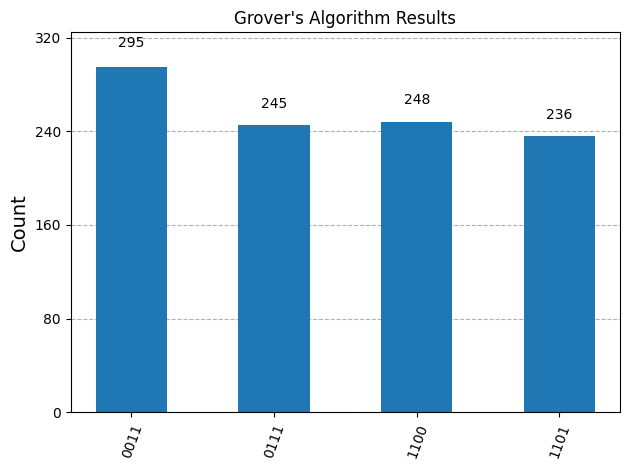

In [28]:
qc_compiled = transpile(qc, qasm_sim)
job = qasm_sim.run(qc_compiled, shots=1024)
results = job.result()
plot_histogram(results.get_counts(qc), title='Grover\'s Algorithm Results')

## 5. Kaynakçalar <a id='references'></a>

1. L. K. Grover (1996), "A fast quantum mechanical algorithm for database search", Proceedings of the 28th Annual ACM Symposium on the Theory of Computing (STOC 1996), [doi:10.1145/237814.237866](http://doi.acm.org/10.1145/237814.237866), [arXiv:quant-ph/9605043](https://arxiv.org/abs/quant-ph/9605043)
2. C. Figgatt, D. Maslov, K. A. Landsman, N. M. Linke, S. Debnath & C. Monroe (2017), "Complete 3-Qubit Grover search on a programmable quantum computer", Nature Communications, Vol 8, Art 1918, [doi:10.1038/s41467-017-01904-7](https://doi.org/10.1038/s41467-017-01904-7), [arXiv:1703.10535 ](https://arxiv.org/abs/1703.10535)
3. I. Chuang & M. Nielsen, "Quantum Computation and Quantum Information", Cambridge: Cambridge University Press, 2000.   
4. Marconi, C., Aloy, A., Tura, J., & Sanpera, A. (2021). Entangled symmetric states and copositive matrices. Quantum, 5, 561.
5. R. Prevedel, G. Cronenberg, M. S. Tame, M. Paternostro, P. Walther, M. S. Kim, and A. Zeilinger, “Experimental realization of dicke states of up to six qubits for multiparty quantum networking,” Physical Review Letters, vol. 103, no. 2, Jul 2009.   
6. D. Cruz, R. Fournier, F. Gremion, A. Jeannerot, K. Komagata, T. Tosic, J. Thiesbrummel, C. L. Chan, N. Macris, M.-A. Dupertuis et al., “Efficient quantum algorithms for ghz and w states, and implementation on the ibm quantum computer,” Advanced Quantum Technologies, vol. 2, no. 5-6, p.1900015, 2019. https://doi.org/10.1002/qute.201900015
7. Magniez, F., Santha, M., & Szegedy, M. (2007). Quantum algorithms for the triangle problem. SIAM Journal on Computing, 37(2), 413-424.